# CUSTOMER CHURN PREDICTION IN TELECOM INDUSTRY USING MACHINE LEARNING

This project involves predicting customer churn in the telecom industry using a dataset containing customer information such as demographics, service usage, and account details. The dataset includes columns like "customerID", "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "InternetService", "StreamingTV", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", and "TotalCharges", with "Churn" as the target variable indicating whether a customer has discontinued the service. Various classification models, including K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Logistic Regression, Random Forest, and Decision Tree, were applied to analyze the data. The models were assessed using appropriate evaluation metrics to identify the most effective approach for predicting customer churn and gaining insights into the factors influencing it.

Importing Dataset and Libraries

In [2]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
df=pd.read_csv(r"E:\data_analytics\ml_works\machine_learning_projects\Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Removing Unwanted Columns

In [3]:
df=df.drop(['DeviceProtection','OnlineBackup','TechSupport','gender','StreamingMovies','OnlineSecurity'],axis=1)
print(df.columns)

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')


Information About Data

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   StreamingTV       7043 non-null   object 
 9   Contract          7043 non-null   object 
 10  PaperlessBilling  7043 non-null   object 
 11  PaymentMethod     7043 non-null   object 
 12  MonthlyCharges    7043 non-null   float64
 13  TotalCharges      7043 non-null   object 
 14  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 825.5+ KB
None


Removing Null Values

In [5]:
#removing null values
df.isna().sum()
df.dropna(inplace=True)

Removing Duplicates

In [6]:
#remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

Encoding Categorical Values

In [7]:
#converting categorical data in to numerical data
le=LabelEncoder()
column_to_convert=['Partner','Dependents','PhoneService','MultipleLines','InternetService','StreamingTV','Contract','PaperlessBilling','PaymentMethod','Churn']
for col in column_to_convert:
    df[col]=le.fit_transform(df[col])
df.head(10)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,1,0,1,0,1,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,0,0,0,34,1,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,0,0,0,2,1,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,0,0,0,45,0,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,2,1,0,1,0,0,1,2,70.70,151.65,1
5,9305-CDSKC,0,0,0,8,1,2,1,2,0,1,2,99.65,820.5,1
6,1452-KIOVK,0,0,1,22,1,2,1,2,0,1,1,89.10,1949.4,0
7,6713-OKOMC,0,0,0,10,0,1,0,0,0,0,3,29.75,301.9,0
8,7892-POOKP,0,1,0,28,1,2,1,2,0,1,2,104.80,3046.05,1
9,6388-TABGU,0,0,1,62,1,0,0,0,1,0,0,56.15,3487.95,0


Finding Correlation

In [8]:
corr_metrics=df.corr(numeric_only=True)
print(corr_metrics)

                  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
SeniorCitizen          1.000000  0.016479   -0.211185  0.016567      0.008576   
Partner                0.016479  1.000000    0.452676  0.379697      0.017706   
Dependents            -0.211185  0.452676    1.000000  0.159712     -0.001762   
tenure                 0.016567  0.379697    0.159712  1.000000      0.008448   
PhoneService           0.008576  0.017706   -0.001762  0.008448      1.000000   
MultipleLines          0.146185  0.142410   -0.024991  0.343032     -0.020538   
InternetService       -0.032310  0.000891    0.044590 -0.030359      0.387436   
StreamingTV            0.030776  0.137341    0.046885  0.289373      0.055353   
Contract              -0.142554  0.294806    0.243187  0.671607      0.002247   
PaperlessBilling       0.156530 -0.014877   -0.111377  0.006152      0.016505   
PaymentMethod         -0.038551 -0.154798   -0.040292 -0.370436     -0.004184   
MonthlyCharges         0.220

Scatter plot

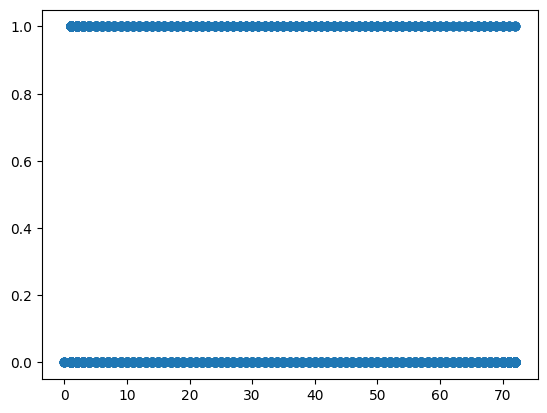

In [9]:
plt.scatter(df['tenure'],df['Churn'])
plt.show()

Dependent and Independent Variables

In [10]:
x=df.iloc[:,1:14].values
x=pd.DataFrame(x)
y=df.iloc[:,14].values
y=pd.DataFrame(y)
print(x)
print(y)

     0  1  2   3  4  5  6  7  8  9  10      11       12
0     0  1  0   1  0  1  0  0  0  1  2   29.85    29.85
1     0  0  0  34  1  0  0  0  1  0  3   56.95   1889.5
2     0  0  0   2  1  0  0  0  0  1  3   53.85   108.15
3     0  0  0  45  0  1  0  0  1  0  0    42.3  1840.75
4     0  0  0   2  1  0  1  0  0  1  2    70.7   151.65
...  .. .. ..  .. .. .. .. .. .. .. ..     ...      ...
7038  0  1  1  24  1  2  0  2  1  1  3    84.8   1990.5
7039  0  1  1  72  1  2  1  2  1  1  1   103.2   7362.9
7040  0  1  1  11  0  1  0  0  0  1  2    29.6   346.45
7041  1  1  0   4  1  2  1  0  0  1  3    74.4    306.6
7042  0  0  0  66  1  0  1  2  2  1  0  105.65   6844.5

[7043 rows x 13 columns]
      0
0     0
1     0
2     1
3     0
4     1
...  ..
7038  0
7039  0
7040  0
7041  1
7042  0

[7043 rows x 1 columns]


Splitting Variables in to Test and Train

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train=x_train.apply(pd.to_numeric,errors='coerce')
x_test=x_test.apply(pd.to_numeric,errors='coerce')
x_train.fillna(0,inplace=True)
x_test.fillna(0,inplace=True)

Feature Scaling

In [12]:
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_train)

[[-4.37749204e-01 -9.69578591e-01  1.53218588e+00 ...  1.33926673e+00
  -4.73723375e-04 -4.19924521e-01]
 [-4.37749204e-01 -9.69578591e-01 -6.52662324e-01 ... -1.47094882e+00
   1.07475386e+00  1.25601669e+00]
 [-4.37749204e-01  1.03137591e+00 -6.52662324e-01 ...  4.02528212e-01
  -1.37649913e+00 -1.00028321e+00]
 ...
 [-4.37749204e-01  1.03137591e+00  1.53218588e+00 ...  4.02528212e-01
  -1.45294499e+00 -8.75404569e-01]
 [ 2.28441306e+00 -9.69578591e-01 -6.52662324e-01 ...  4.02528212e-01
   1.14953785e+00 -4.80309046e-01]
 [-4.37749204e-01 -9.69578591e-01 -6.52662324e-01 ... -5.34210304e-01
  -1.49781538e+00 -8.08568424e-01]]


### SVM Model

In [13]:
from sklearn.svm import SVC

Model fitting

In [14]:
classifier=SVC(kernel='linear',random_state=42)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

Model Prediction

In [15]:
y_pred=classifier.predict(x_test)
print(y_pred)
print(y_test)

[0 0 0 ... 0 0 0]
      0
185   1
2715  0
3825  0
1807  1
132   0
...  ..
6366  0
315   0
2439  0
5002  0
1161  1

[1409 rows x 1 columns]


Model Evaluation

In [16]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.19446415897799857
mean squared error: 0.19446415897799857
root mean squared error: 0.44098090545736623


Prediction Accuracy

In [17]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy*100,"%")

80.55358410220013 %


### KNN Model

In [18]:
from sklearn.neighbors import KNeighborsClassifier

Model Fitting

In [19]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

Model Prediction

In [20]:
y_pred=classifier.predict(x_test)
print(y_pred)
print(y_test)

[0 0 0 ... 0 0 0]
      0
185   1
2715  0
3825  0
1807  1
132   0
...  ..
6366  0
315   0
2439  0
5002  0
1161  1

[1409 rows x 1 columns]


Model Evaluation

In [21]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.23775727466288146
mean squared error: 0.23775727466288146
root mean squared error: 0.48760360402983227


Prediction Accuracy

In [22]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy*100,"%")

76.22427253371185 %


### Decision Tree Model

In [23]:
from sklearn.tree import DecisionTreeClassifier

Model Fitting

In [24]:
classifier=DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Model Prediction

In [25]:
y_pred=classifier.predict(x_test)
print(y_pred)
print(y_test)

[1 0 0 ... 0 0 1]
      0
185   1
2715  0
3825  0
1807  1
132   0
...  ..
6366  0
315   0
2439  0
5002  0
1161  1

[1409 rows x 1 columns]


Model Evaluation

In [26]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.2789212207239177
mean squared error: 0.2789212207239177
root mean squared error: 0.52812992788131


Prediction Accuracy

In [27]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy*100,"%")

72.10787792760823 %


### Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression

Model Fitting

In [29]:
model=LogisticRegression(max_iter=1000)
model.fit(x_test,y_test)

LogisticRegression(max_iter=1000)

Model Prediction

In [30]:
y_pred=model.predict(x_test)
print(y_test)
print(y_pred)

      0
185   1
2715  0
3825  0
1807  1
132   0
...  ..
6366  0
315   0
2439  0
5002  0
1161  1

[1409 rows x 1 columns]
[0 0 0 ... 0 0 1]


Model Evaluation

In [31]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.18452803406671398
mean squared error: 0.18452803406671398
root mean squared error: 0.4295672637279451


Prediction Accuracy

In [32]:
score=metrics.accuracy_score(y_test,y_pred)
print(score*100,"%")

81.5471965933286 %


### Random Forest Model

In [33]:
from sklearn.ensemble import RandomForestClassifier

Model Fitting

In [34]:
classifier=RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=42)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

Model Prediction

In [35]:
y_pred=classifier.predict(x_test)
print(y_test)
print(y_pred)

      0
185   1
2715  0
3825  0
1807  1
132   0
...  ..
6366  0
315   0
2439  0
5002  0
1161  1

[1409 rows x 1 columns]
[0 0 0 ... 0 0 0]


Model Evaluation

In [36]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.22356281050390348
mean squared error: 0.22356281050390348
root mean squared error: 0.4728242913640367


Prediction Accuracy

In [37]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy*100,"%")

77.64371894960965 %


Conclusion:
In this telecom churn prediction project, I implemented several machine learning models, including K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Logistic Regression, Random Forest, and Decision Tree, to analyze customer data and predict churn. Among all the models, the Logistic Regression model delivered the highest accuracy of 81.5%, demonstrating its robustness and interpretability for this classification problem.
The analysis revealed key predictors of customer churn, including tenure, contract type, monthly charges, and whether the customer used paperless billing. These insights are critical for developing targeted customer retention strategies, such as offering personalized contract options or incentives for long-term commitments.